In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('/home/babs/Documents/DIFACQUIM/PPI_ML'))

In [2]:
import phase1


In [3]:
from phase1.support_functions.df_management import get_data, get_random_smiles, get_positive_records, filter_positive_bits, filter_negative_bits
from phase1.support_functions.draw_molecules import get_ECFP4_bits, get_ECFP6_bits, draw_one_fragment

In [4]:
from phase1.support_functions.df_management import *

In [5]:
coeff = get_coefficients("SVM17_+_-std.csv")
coeff = coeff.Descriptors.to_list()
coeff[:5]

[1390, 935, 1160, 202, 160]

In [6]:
data = get_data("dataset_ecfp6.csv")
print(data.head(2))

   ipp_id chembl_id                                             SMILES  \
0     4.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br   
1     7.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   

  library  PPI family  PPI    0    1    2    3  ...  2038  2039  2040  2041  \
0     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
1     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   

   2042  2043  2044  2045  2046  2047  
0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 2054 columns]


/home/babs/.pyenv/versions/miniconda3-3.8-4.9.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

In [19]:
#encontrar moleculas que estan en coeff y en fragments


# filter positives

In [12]:
bits_ = [1160]
positives_0 = filter_positive_bits(bits_, data)
positives_0

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
5,26.0,NaN,CC(C)c1ccccc1Sc1ccc(cc1C(F)(F)F)-c1ccnc(c1)N1C...,PPI,LFA / ICAM,Yes,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,31.0,NaN,CC(=O)N1CCN(CC1)c1cc(ccn1)-c1ccc(Sc2ccc3OCCOc3...,PPI,LFA / ICAM,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,37.0,NaN,CC(C)c1ccccc1Sc1ccc(cc1C(F)(F)F)-c1cc(ncn1)N1C...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,45.0,NaN,CC(C)c1ccccc1Sc1ccc(cc1C(F)(F)F)-c1cc(ncn1)N1C...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,75.0,NaN,COCCCNc1nc(cs1)-c1ccc(Sc2ccccc2C(C)C)c(c1)C(F)...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,NaN,Ozenoxacin,CNC1=NC=C(C=C1C)C1=CC=C2C(=O)C(=CN(C3CC3)C2=C1...,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4386,NaN,Oxolamine,CCN(CC)CCC1=NC(=NO1)C1=CC=CC=C1,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,NaN,Anethole trithione,COC1=CC=C(C=C1)C1=CC(=S)SS1,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4503,NaN,Acetyl sulfisoxazole,CC(=O)N(C1=C(C)C(C)=NO1)S(=O)(=O)C1=CC=C(N)C=C1,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
positives_0[positives_0["ipp_id"]==1602.0]

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
356,1602.0,NaN,Cc1nnc2[C@H](CC(=O)OC(C)(C)C)N=C(c3c(C)c(C)sc3...,PPI,Bromodomain / Histone,Yes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
positive_molecule = positives_0[positives_0["ipp_id"]==1602.0].SMILES
positive_molecule = positive_molecule.iloc[0]
positive_molecule

'Cc1nnc2[C@H](CC(=O)OC(C)(C)C)N=C(c3c(C)c(C)sc3-n12)c1ccc(Cl)cc1'

In [19]:
# bits_ = [1390, 935]
# positives_1 = filter_positive_bits(bits_, data)
# print(f"molecules : {positives_1.shape}")
# print(positives_1.iloc[2][["ipp_id", "SMILES"]])

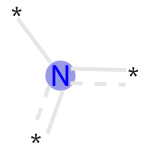

In [23]:
draw_one_fragment(positive_molecule, 935, 3)

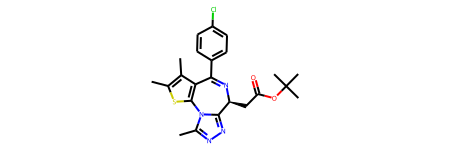

In [24]:
mol_ = Chem.MolFromSmiles(positive_molecule)
mol_

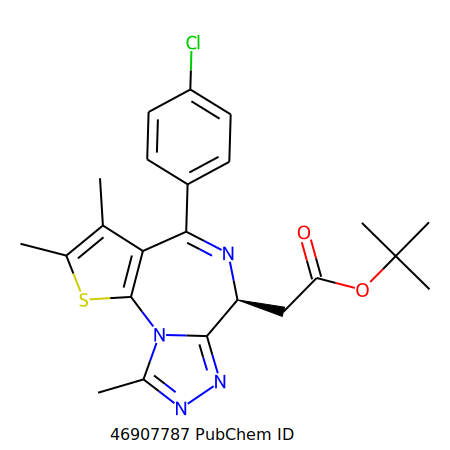

In [30]:
from rdkit import Chem
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromSmiles('Cc1nnc2[C@H](CC(=O)OC(C)(C)C)N=C(c3c(C)c(C)sc3-n12)c1ccc(Cl)cc1')
rdDepictor.Compute2DCoords(mol)
drawer = rdMolDraw2D.MolDraw2DSVG(450, 450)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# svg to text
s = drawer.GetDrawingText()
s = s.replace('svg:','')

# use svgutils to add text to svg
import svgutils.transform as sg
fig = sg.fromstring(s)
label = sg.TextElement(110, 440, 
                       "46907787 PubChem ID", size=16, 
                      )
fig.append(label)
root = "/home/babs/Documents/DIFACQUIM/PPI_ML/phase1/driver_code/chemical_structures/"
fig.save(f"{root}1602.svg")
SVG(fig.to_str())

In [25]:
mol_ = Chem.Draw.MolToImage(mol_)
type(mol_)

PIL.PngImagePlugin.PngImageFile

In [34]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
positive_mol = Chem.MolFromSmiles(positive_molecule)
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        positive_mol, radius=3, bitInfo=bi)

In [41]:
desired_bits = common_bits(coeff, get_ECFP6_bits(positive_molecule))
desired_bits

[935, 1160, 1747]

In [42]:
desired_bits = (935, 1160, 1747)

In [47]:
#Visualizacion con filtro
tpls =[(positive_mol,x,bi) for x in fp.GetOnBits() if x in desired_bits]
# print(tpls)


drawOptions = Draw.rdMolDraw2D.MolDrawOptions()
drawer = Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits() if x in desired_bits ], 
                             #useSVG=True,
                             subImgSize=(450, 450),
                             drawOptions = drawOptions,
                            )


In [51]:
drawer.save(f"{root}1602_fragments.jpg")

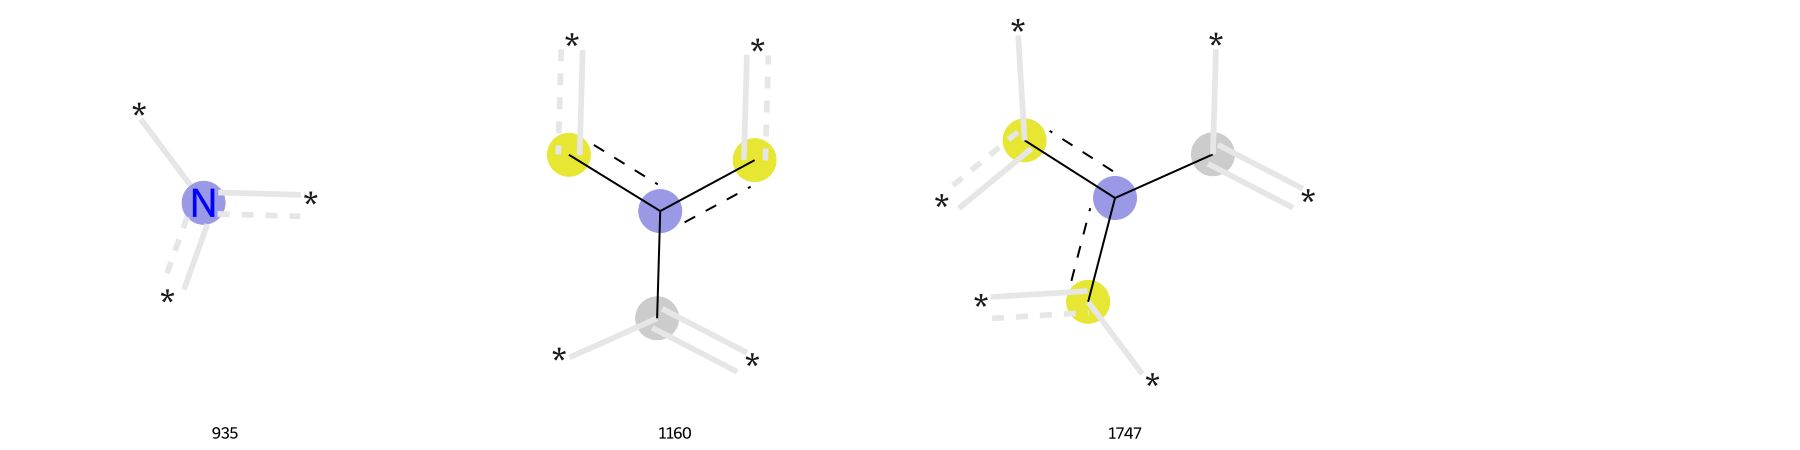

In [52]:
drawer

In [53]:
from PIL import Image
#Read the two images
#image1 = mol_
image1 = Image.open(f'{root}1602.jpg')
image1.show()
image2 = Image.open(f'{root}1602_fragments.jpg')
#image2.show()
#resize, first image
image1 = image1.resize((450, 450))
#image2 = image2.resize((450, 450))
image1_size = image1.size
image2_size = image2.size
new_image = Image.new('RGB',(5*image1_size[0], image1_size[1]), (450, 450, 450))
new_image.paste(image1,(0,0))
new_image.paste(image2,(image1_size[0],0))
new_image.save(f"{root}id1602_merged.jpg","JPEG")
new_image.show()

# filter negatives

In [32]:
negative_0 = filter_negative_bits(["558"], data)
negative_0.head(2)

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,4.0,NaN,OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
negative_molecule_0 = negative_0.iloc[0]
negative_molecule_0.SMILES
# draw_one_fragment(positive_molecule, 57)

'OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br'

In [30]:
draw_one_fragment(positive_molecule, 57)

TypeError: draw_one_fragment() missing 1 required positional argument: 'r'

In [ ]:
draw_one_fragment(positive_molecule, 57)

In [ ]:
negative_1 = filter_negative_bits(["558", "1"], data)
negative_1.head()

In [ ]:
# calculo de porcentajes 548
negatives = negative_0[negative_0["library"]=="PPI"].shape[0]

In [ ]:
total = data[data["library"]=="PPI"].shape[0]

In [ ]:
percentage = (negatives/total)
percentage